# **Capstone Project** - Yes Bank Stock Closing Price Prediction

# **Project by** - Saikumar ES 

# **Problem Statement:**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter data/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(185, 5)

There are 185 rows and 5 columns

Columns in the dataset are:

*   Date
*   Open
*   High
*   Low
*   Close




### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


This dataset contains 185 rows and 5 columns. There is no null values in the dataset. There are 4 columns in the dataset as the float datatype. We can convert the date which is object into the date time datatype.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Visualizing the missing values
data.isnull().values.any()

False

In this dataset there is no missing values.

#### Understanding Your Variables

In [ ]:
# Dataset Columns
data_columns = data.columns
data_columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


We can see from the dataframe, all the columns we have contain numerical data. There is no categorical data present.

In [ ]:
#changing the format of the date
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


We could able to see the date formate is changed now

In [ ]:
# Checking for null values.
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

We could see there is no  null data in the dataset

### Classifying Data into Dependent and Independent

In [ ]:
#Seperating the dependent variable and independent variable
data_independent = list()
data_dependent = ['Close']
for i in data.columns[1:]:
  if i != 'Close':

    data_independent.append(i)
print(data_independent)
print(data_dependent)

['Open', 'High', 'Low']
['Close']


#### Data Validation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


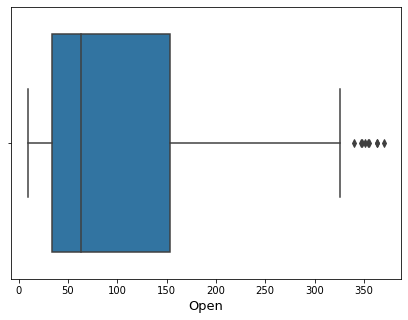

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


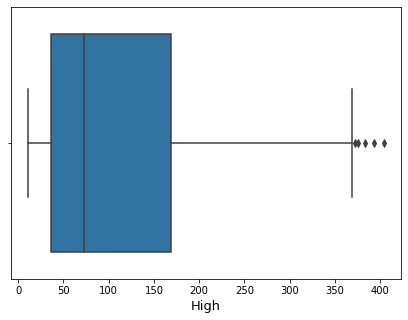

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


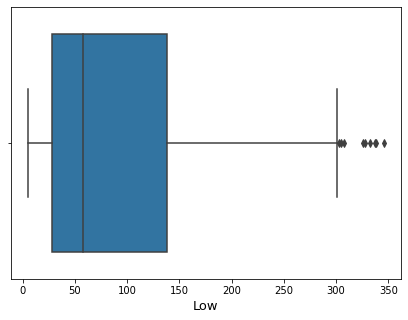

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


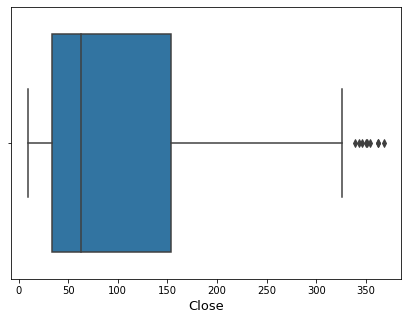

In [ ]:
#checking for outliers using barplot
for col in data_columns[1:]:
  plt.figure(figsize=(7,5))
  sns.boxplot(data[col])
  plt.xlabel(col, fontsize=13)
  plt.show()


As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling. We can use log to get rid of this outliers

### EDA

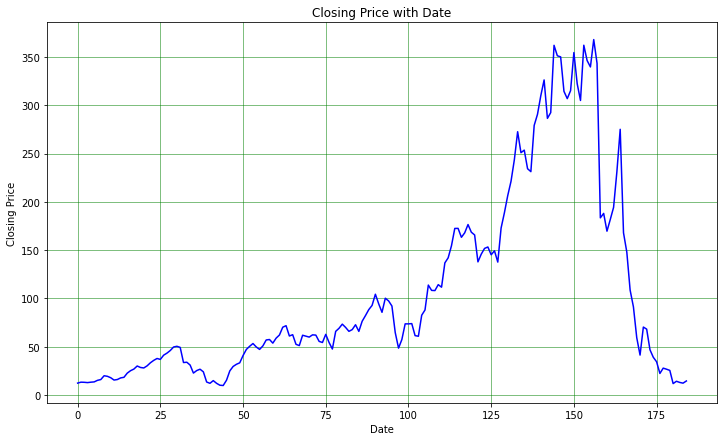

In [ ]:
# Plotting the dependent variable .


plt.figure(figsize=(12,7))
data['Close'].plot(color = 'b')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


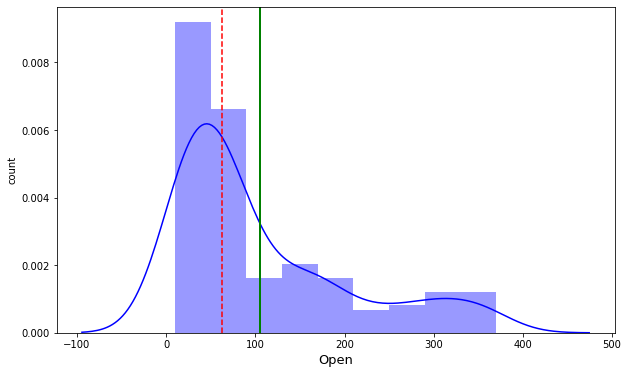

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


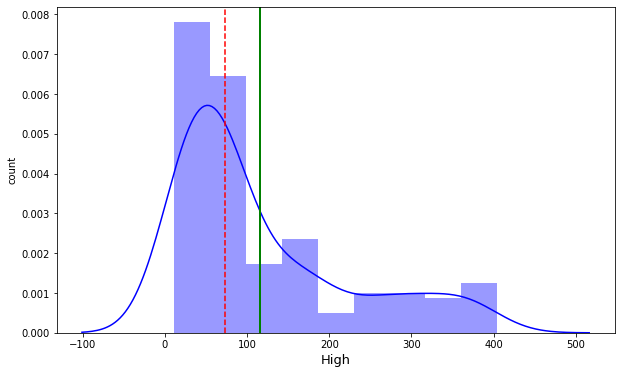

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


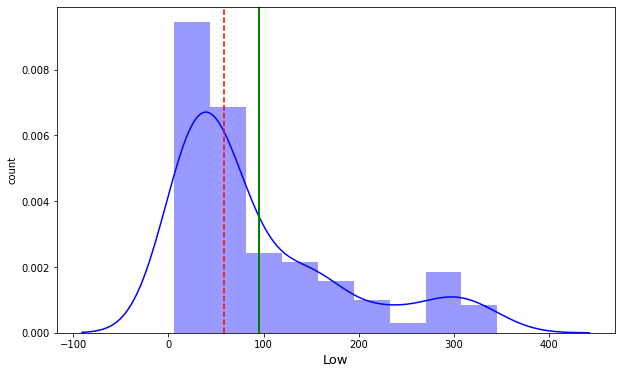

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


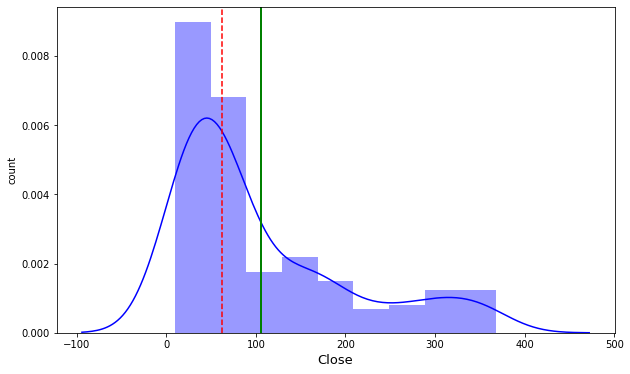

In [ ]:
# Plotting the distributions of all features.
for col in data_columns[1:]:
  plt.figure(figsize=(10,6))
  sns.distplot(data[col], color='b')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(data[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(data[col].median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

We could able to see the skewness in the data. So we are using the log transformation to the data. This skewness is due to the outliers. Since the dataset is not too large in removing the outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


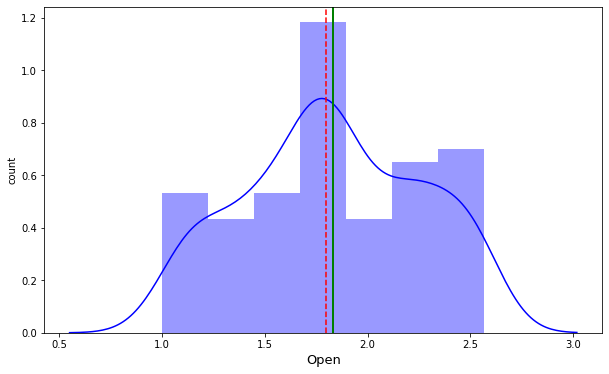

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


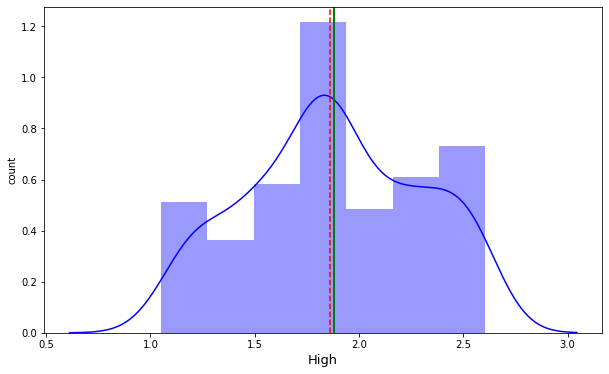

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


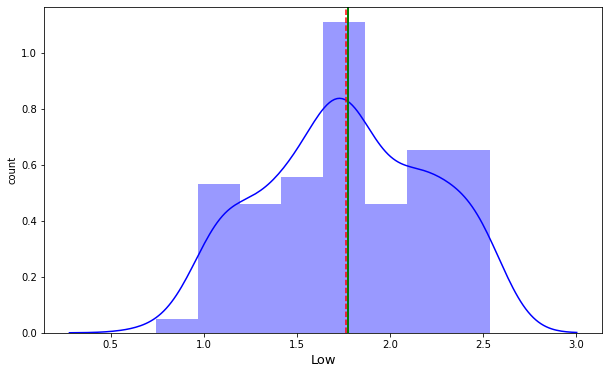

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


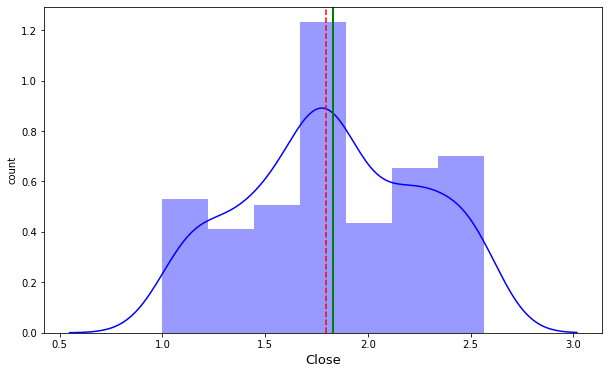

In [ ]:
for col in data_columns[1:]:
  plt.figure(figsize=(10,6))
  values = np.log10(data[col])
  sns.distplot(values, color='b')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(values.mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(values.median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

We could able to see the data is normalized

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


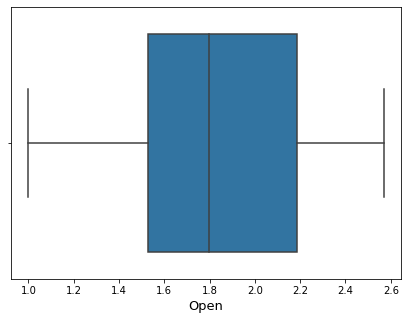

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


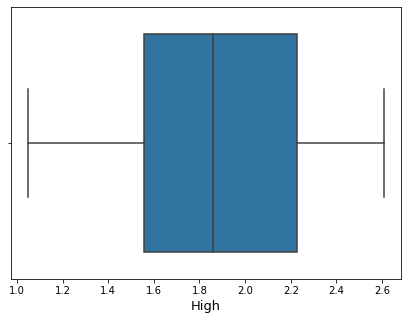

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


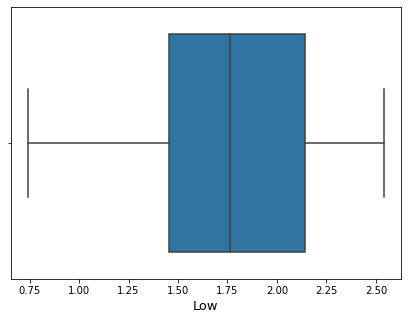

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


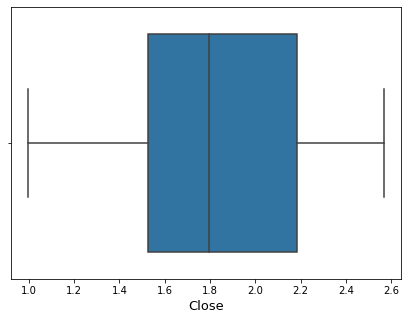

In [ ]:
#Now checking the outliers in the data:

for col in data_columns[1:]:
  plt.figure(figsize=(7,5))
  values = np.log10(data[col])
  sns.boxplot(values)
  plt.xlabel(col, fontsize=13)
  plt.show()



### Checking the Correlation between the variables

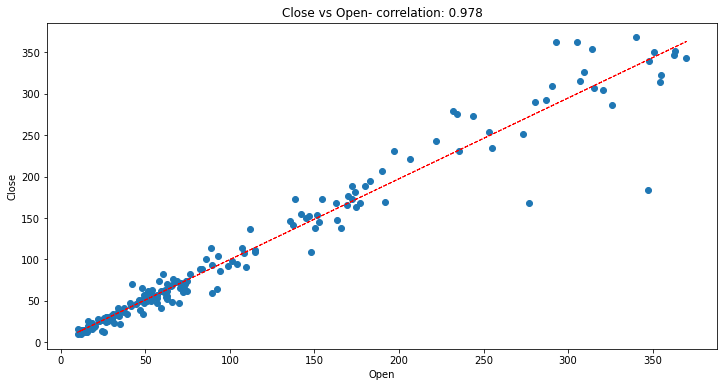

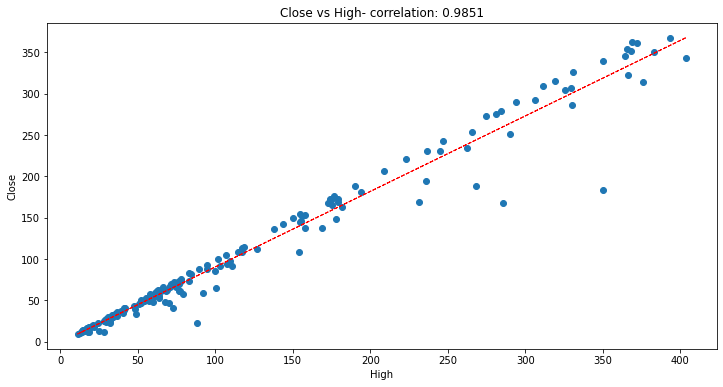

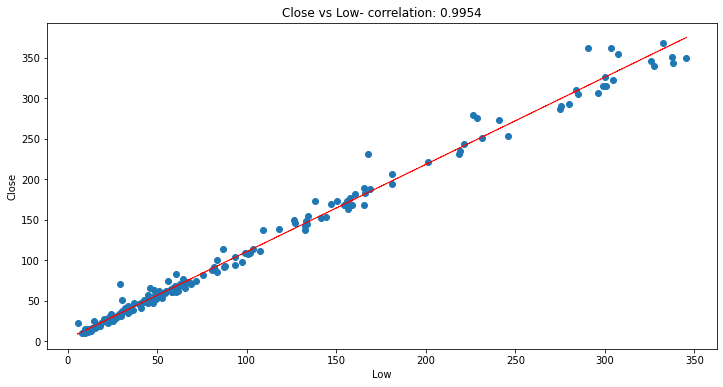

In [ ]:
for col in data_independent:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = data[col]
  label = data['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.  

  # Setting the x,y labels and the title.
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))

  z = np.polyfit(data[col], data['Close'], 1)                                
  y_hat = np.poly1d(z)(data[col])

  plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

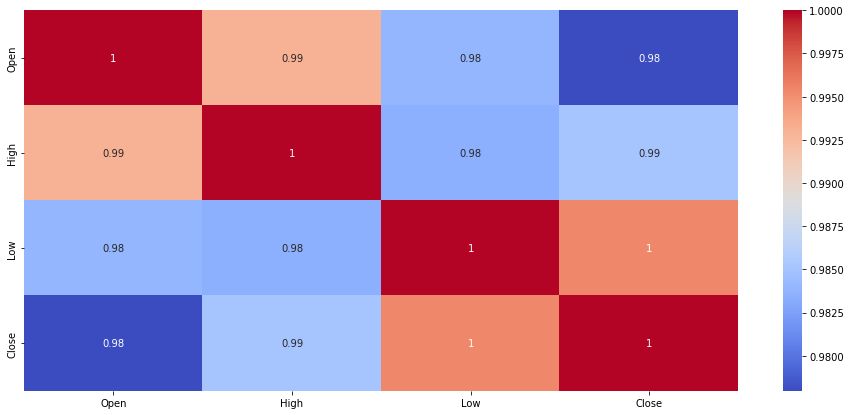

In [ ]:
#Checking the correlation between the dependent variables and independent variables using heatmap

corr = data.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the Regression line we could able to see a higher correlation between dependent variable and independent variable. But at the same time we could able to see the high correlation between the dependent variables which causes multicollinearity.This might be a issue with the dataset.



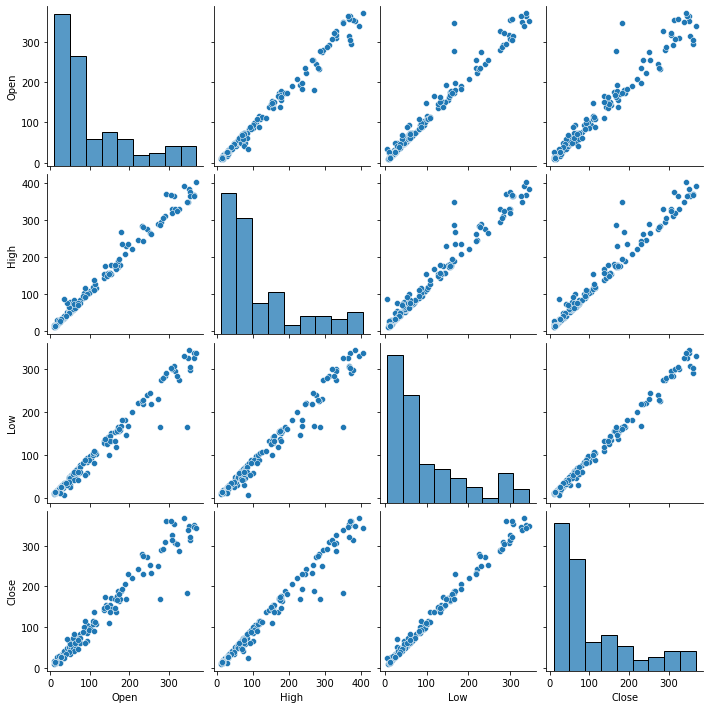

In [ ]:
#Visualise the relationship between each pair of variables using pair plots.
sns.pairplot(data)

### Data Preprocessing

In [ ]:
#Checking the VIF for the multicollineratiry

def vif_factor(x):

  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return(vif)

In [ ]:
vif_factor(data[[i for i in data.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We could able to see high VIF values.This indicates the high multicollinearity. Since we dont have much variables we need to proceed with this data 

### Data Processing

In [ ]:

# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(data[data_independent]).values
y = np.log10(data[data_dependent]).values

In [ ]:
# splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.  So we use the inbuilt function scaler to standardiztion or the normalization of the data 

In [ ]:
# Scaling the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#scalled values

x_train[0:10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

### **Linear Regression**

In [ ]:
# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(x_train, y_train)
     

LinearRegression()

In [ ]:
# Predicting on our test data.
y_pred_linear = model_lr.predict(x_test)

In [ ]:
model_lr.intercept_

array([1.79986471])

In [ ]:
model_lr.coef_

array([[-0.22992597,  0.33533242,  0.31585415]])

In [ ]:
# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean Absolute Error : 4.8168
Mean squared Error : 70.4204
Root Mean squared Error : 8.3917
R2 score : 0.9937
Adjusted R2 score : 0.993


After the regression we could able see the R square value of 99.37% which means that the model can explain variation in the data. Lets check whether the R square can be improved with other regression methods like Ridge or Lasso Regression

### Ridge Regression

In [ ]:
# Performing the ridge regression
ridge = Ridge() 
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

In [ ]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
# evaluating performance.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.8334
Mean squared Error : 70.2641
Root Mean squared Error : 8.3824
R2 score : 0.9938
Adjusted R2 score:  0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

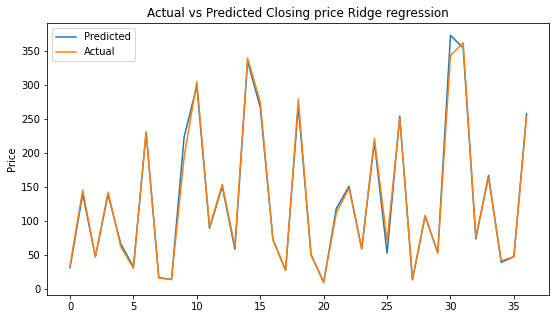

In [ ]:

# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

We Could able to see the predicted is almost fitted with the actual.

### Lasso Regression

In [ ]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
#getting the coefficient and intercept of Lasso regression
print(lasso.intercept_)

print(lasso.coef_)

[1.79986471]
[-0.2079326   0.319775    0.30927158]


In [ ]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                  
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)
     

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting the best parameter
lasso_regressor.best_params_ 

{'alpha': 1e-05}

In [ ]:
# getting the best score
lasso_regressor.best_score_

-0.00115301566718728

In [ ]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)
     

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


In [ ]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.8262
Mean squared Error : 70.3311
Root Mean squared Error : 8.3864
R2 score : 0.9938
Adjusted R2 score:  0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

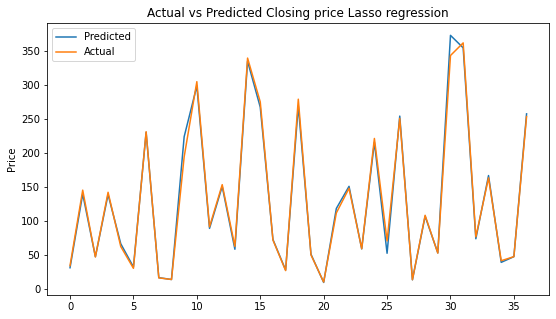

In [ ]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

We could able to see there is no much improvement in the R square value after the Lasso or Ridge regression

### Elastic-Net Regression

In [ ]:
# Initializing Elastic-Net Regression.

elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e-02, tolerance: 2.074e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.013e-02, tolerance: 2.149e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.348e-02, tolerance: 2.007e-03

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [ ]:

# finding the best parameter
elasticnet_regressor.best_params_


# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

In [ ]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.8483
Mean squared Error : 70.1569
Root Mean squared Error : 8.376
R2 score : 0.9938
Adjusted R2 score:  0.9932


Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

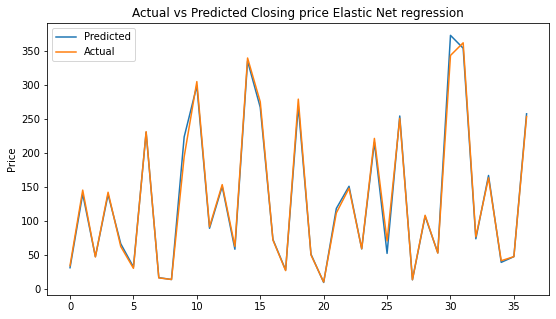

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

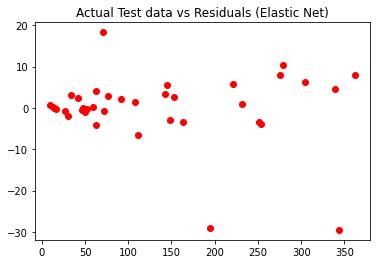

In [ ]:
# Check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net.reshape(37,1)
plt.scatter(10**y_test,residuals,c='red')
plt.title('Actual Test data vs Residuals (Elastic Net)')

There is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So the assumption of Homoscedasticity is valid here.

### Conclusions Drawn :
* Using data visualization(line chart) on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.
* After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.
* There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.
We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
* There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
* We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.
* We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.
* All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99.32%.
* We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present.